
# Project: No-show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>In this project, we'll be analysing datasets containing information from 100k medical appointments in Brazil. We'll be focusing on whether or not patients show up for their appointments and find out the factors that influence this decision.The dataset contains a table with 14 columns; the patient ID and Appointment ID columns which are unique identifiers for the patient and their appointment respectively, gender column, ScheduledDay which is the day the patient set up their appointment, AppointmentDay, Age, Neighborhood which indicates the location of the hospital, Scholarship column indicates whether or not the patient is enrolled in Brasilian welfare program, Hypertension, Diabetes, Alcoholism, Handcap, SMS_received column indicates if the patient received an sms, and finally, No-Show column to indicate if a patient showed up or not. It is important to note that it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.



### Question(s) for Analysis
  -  What percentage showed up for the appointment?
  -  What is the relationship between the scheduling date, the appointment date and the no show?
  -  How does age affect patient showing up?
  -  How does sms reminder affect patiend show up?
  -  Does scholarship have any effect on patient showing up?


In [1]:
!pip install pandas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

  Using cached pandas-0.25.0.tar.gz (12.6 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): still running...
  Preparing metadata (setup.py): finished with status 'done'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [909 lines of output]
  C:\Users\Hp\AppData\Local\Temp\pip-install-ln8nsf_e\pandas_07e00fa4c1574803af361ba4aacc495b\setup.py:53: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
    _CYTHON_INSTALLED = ver >= LooseVersion(min_cython_ver)
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9
  creating build\lib.win-amd64-3.9\pandas
  copying pandas\conftest.py -> build\lib.win-amd64-3.9\pandas
  copying pandas\testing.py -> build\lib.win-amd64-3.9\pandas
  copying pandas\_typing.py -> build\lib.win-amd64-3.9\pandas
  copying pandas\_version.py -> build\lib.win-amd64-3.9\pandas
  copying pandas\__init__.py -> build\lib.win-amd64-3.9\pandas
  creating build\lib.win-amd64-3.9\pandas\api
  copying pandas\api\__init__.py -> build\lib.win-amd64-3.9\pandas\api
  creating build\lib

  Running setup.py clean for pandas
Failed to build pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.2
    Uninstalling pandas-1.4.2:
      Successfully uninstalled pandas-1.4.2
  Running setup.py install for pandas: started
  Running setup.py install for pandas: finished with status 'error'
  Rolling back uninstall of pandas
  Moving to c:\users\hp\pythonconda\lib\site-packages\pandas-1.4.2.dist-info\
   from C:\Users\Hp\PythonConda\Lib\site-packages\~-ndas-1.4.2.dist-info
  Moving to c:\users\hp\pythonconda\lib\site-packages\pandas\
   from C:\Users\Hp\PythonConda\Lib\site-packages\~-ndas



  copying pandas\core\indexing.py -> build\lib.win-amd64-3.9\pandas\core
  copying pandas\core\missing.py -> build\lib.win-amd64-3.9\pandas\core
  copying pandas\core\nanops.py -> build\lib.win-amd64-3.9\pandas\core
  copying pandas\core\resample.py -> build\lib.win-amd64-3.9\pandas\core
  copying pandas\core\series.py -> build\lib.win-amd64-3.9\pandas\core
  copying pandas\core\sorting.py -> build\lib.win-amd64-3.9\pandas\core
  copying pandas\core\strings.py -> build\lib.win-amd64-3.9\pandas\core
  copying pandas\core\window.py -> build\lib.win-amd64-3.9\pandas\core
  copying pandas\core\__init__.py -> build\lib.win-amd64-3.9\pandas\core
  creating build\lib.win-amd64-3.9\pandas\errors
  copying pandas\errors\__init__.py -> build\lib.win-amd64-3.9\pandas\errors
  creating build\lib.win-amd64-3.9\pandas\io
  copying pandas\io\api.py -> build\lib.win-amd64-3.9\pandas\io
  copying pandas\io\clipboards.py -> build\lib.win-amd64-3.9\pandas\io
  copying pandas\io\common.py -> build\lib.wi

<a id='wrangling'></a>
## Data Wrangling


### General Properties
After assessing the dataset, the following was discovered;
 -  the data contains 110527 rows and 14 columns
 -  there are no missing values in the dataset
 -  the Data type for patient_id,scheduled_day,AppointmentDay need to be changed
 -  some columns need to be dropped as they are not useful in the analysis (Handcap, diabetes, hypertension and Alcoholism)
 -  there is a row where the age has a negative value (-1) which is invalid and can be replaced with the mean age
 -  out of the 110527 scheduled appointment, patients showed up for only 22319 appointment appointments
 


In [3]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape
#to determine the number of rows and columns in the dataset

(110527, 14)

In [5]:
df.info()
#it gives information on the non-null values and the data types in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe()
#it gives a statistical description of columns in the dataset

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<AxesSubplot:xlabel='Age'>

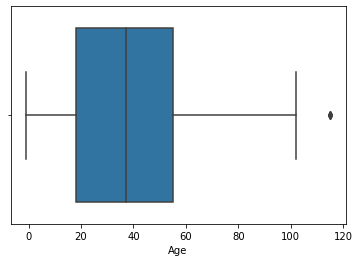

In [6]:
sns.boxplot(x='Age',data = df)

#there is an outlier which is an invalid age in the dataset

In [7]:
df.query('Age == -1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [8]:
df.nunique()
#it gives information on the number of unique values in each column

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
df.Handcap.unique()
#since the handcap coulmn is meant to be boolean (0 or 1), this was carried out to find out all the unique values in the column

array([0, 1, 2, 3, 4], dtype=int64)

In [10]:
sum(df.duplicated())
#to find out duplicated rows

0

In [12]:
df['No-show'].value_counts()

#it gives a count of the values in the No-show column

No     88208
Yes    22319
Name: No-show, dtype: int64

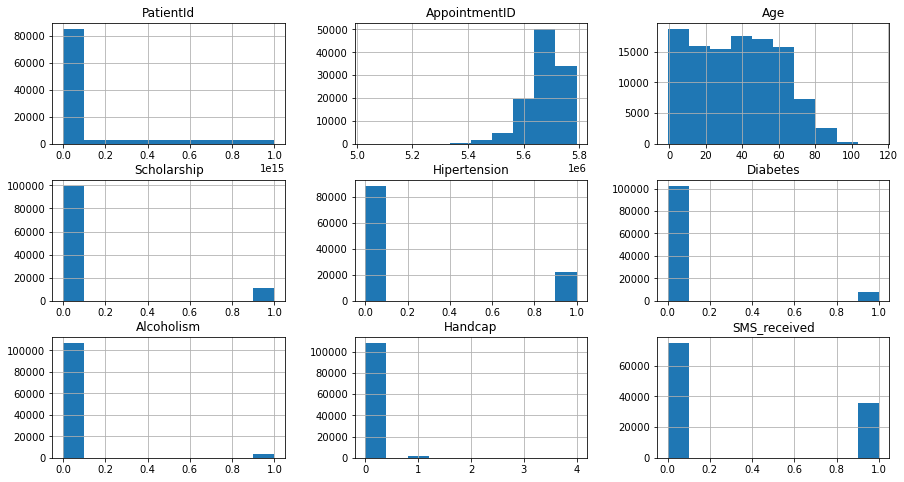

In [11]:
df.hist(figsize=(15, 8));

from this plot we can see that most of the patients;
 -  are below 60 years old
 -  are not on scholarship
 -  does not suffer from alcoholism/diabetes/hipertension or is handicap
 -  does not receive a reminder sms
 -  does not miss the appointment
 
we can make use of the age variable that we can analyse, since it has a better distribution between the amount of patients. Also we can check out the appointment waiting days ( difference between the scheduled date and the appointment date) and the received_sms since it is a 75 percentile and it is the variable with the most difference between the other boolean variables.

### Data Cleaning
 
 

The first cleaning we'll carry out is to change the data types of ScheduledDay, AppointmentDay and PatientId into the correct data types.

In [12]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['PatientId'] = df['PatientId'].apply(str)

In [13]:
df[['ScheduledDay','AppointmentDay','PatientId']].dtypes

ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
PatientId                      object
dtype: object

Next we'll drop the columns we won't be using in the analysis

In [14]:
df.drop(['Hipertension','Diabetes', 'Alcoholism', 'Handcap'],axis=1,inplace=True)

In [15]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'SMS_received',
       'No-show'],
      dtype='object')

The next step is to take care of the invalid age (-1)

In [16]:
age_col = df['Age']
age_col.replace(to_replace = -1, value = age_col.mean(), inplace=True)

In [17]:
df.Age.describe()

count    110527.000000
mean         37.089219
std          23.109921
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

Now let's take a look at our dataset before we begin our analysis

In [18]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,SMS_received,No-show
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0,0,No
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,No
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0,0,No
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0,0,No
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,No
5,95985133231274.0,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76.0,REPÚBLICA,0,0,No
6,733688164476661.0,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23.0,GOIABEIRAS,0,0,Yes
7,3449833394123.0,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39.0,GOIABEIRAS,0,0,Yes
8,56394729949972.0,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21.0,ANDORINHAS,0,0,No
9,78124564369297.0,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19.0,CONQUISTA,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis


### What percentage showed up for Appointment?

Text(0.5, 1.0, 'Patient Show Up (%)')

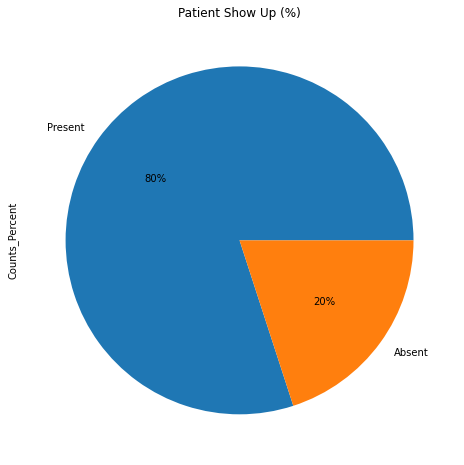

In [19]:
#it takes an argument and returns the percentage count rounded to the nearest whole number

def percent(x):
    percent = round(df[x].value_counts()/len(df)*100)
    return percent
value = percent('No-show')

value.plot(kind = 'pie',labels = ['Present','Absent'], autopct = '%1.0f%%', figsize = (15,8))
plt.ylabel('Counts_Percent')
plt.title("Patient Show Up (%)")

80% of the patients showed up for the appointment while 20% did not show up for appointment.

### What is the relationship between the scheduling date, the appointment date and patient showing up?

Text(0.5, 1.0, 'Relationship Between Appointment Date and Shedule Date')

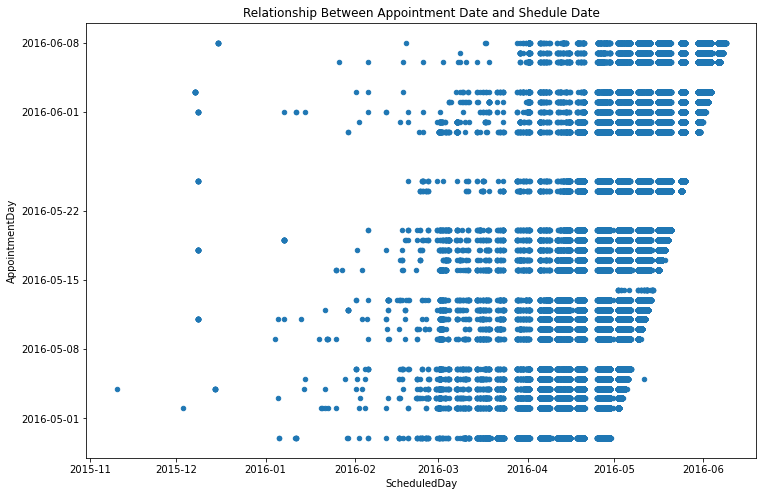

In [21]:
#Relationship between Appointment Date and Schedule Date

df.plot(kind = 'scatter', x = 'ScheduledDay', y ='AppointmentDay', figsize = (12,8))
plt.title('Relationship Between Appointment Date and Shedule Date')

this scattered plot was to check for the relationship between sceduled date and appointment date and it can be seen that most of the appointment was on the same day it was scheduled or even close.

In [20]:
#waiting_days is the difference between the appointment date and the scheduled date. i.e how long the patient had to wait for

df["waiting_days"]=(df['AppointmentDay'] - df['ScheduledDay']).dt.days
df.waiting_days.describe()

count    110527.000000
mean          9.183702
std          15.254996
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: waiting_days, dtype: float64

the mean waiting days is 9days, the 50th percentile is 3 days, 75th percentile is 14 while the maximum waiting date is 178 days

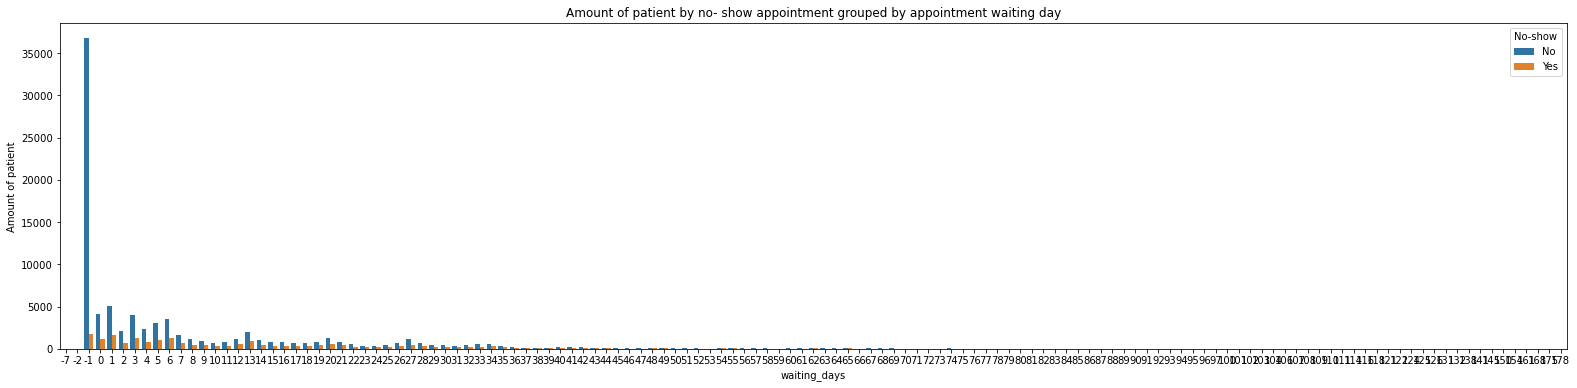

In [25]:
plt.figure(figsize = (27,6))
sns.countplot(x='waiting_days', data=df, hue='No-show')
plt.title('Amount of patient by no- show appointment grouped by appointment waiting day')
plt.ylabel('Amount of patient')
plt.show()

the purpose of the bar chart was to understand the relationship between patient waiting time and ability to show up to appointments and we can see that patients with smaller waiting time tend to show up more to appointments.

### How does SMS reminder affect patient show up?

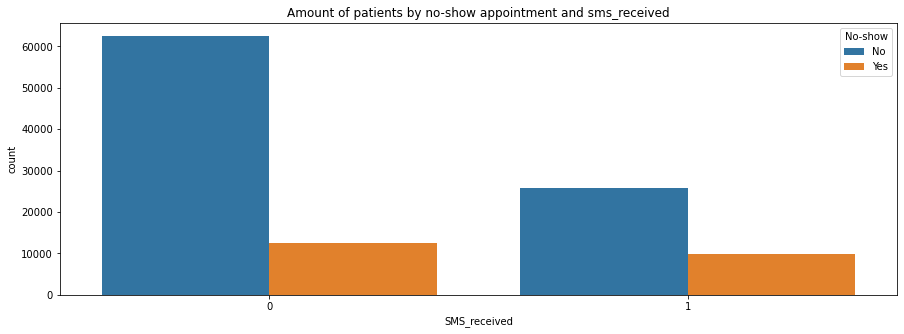

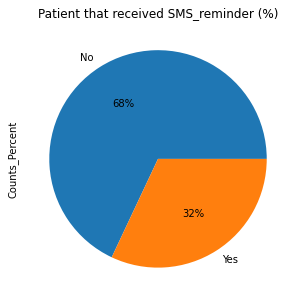

In [37]:
#this is a subplot containing two charts

#this bar chart shows the number of patients that received sms reminder and wether they showed up for appointment or not

fig, axes = plt.subplots(1, 1, figsize=(15, 5)) 
sns.countplot(x='SMS_received', data=df, hue='No-show')
plt.title('Amount of patients by no-show appointment and sms_received')
plt.show()

#this pie chart gives a percentage of those that received sms_reminder and those that did not
sms = percent('SMS_received')
sms.plot(kind = 'pie',labels = ['No','Yes'], autopct = '%1.0f%%', figsize = (15,5))
plt.ylabel('Counts_Percent')
plt.title("Patient that received SMS_reminder (%)")
plt.show()

32% of the patients received an sms_reminer out of which majority attended the appointment.

### How does gender affect patients showing up?

Text(0, 0.5, 'Amount of patient')

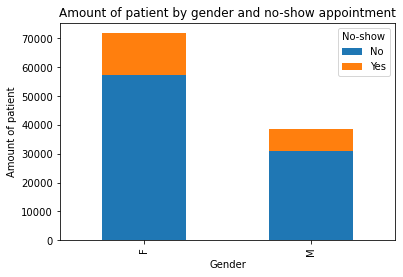

In [38]:
#this is a stacked bar chart showing the relationship between gender and showing up for appointment

df_plot = df.groupby(['No-show', 'Gender']).size().reset_index().pivot(columns='No-show', index='Gender', values=0)
df_plot.plot(kind='bar', stacked=True)
plt.title('Amount of patient by gender and no-show appointment')
plt.ylabel('Amount of patient')

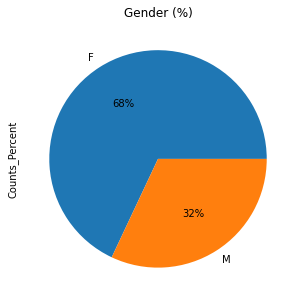

In [40]:
#using the function percent that was defined earlier,the pie chart show the percentage of male and females

gen = percent('Gender')
sms.plot(kind = 'pie',labels = ['F','M'], autopct = '%1.0f%%', figsize = (15,5))
plt.ylabel('Counts_Percent')
plt.title("Gender (%)")
plt.show()

The above charts indicate that 68% of the patients are female while 32% are male and as such, females visit the doctors more than males. Also the females tend to show up more for appointments than males.

### Does scholarship have an effect on patient show up?

Text(0.5, 0, 'Count')

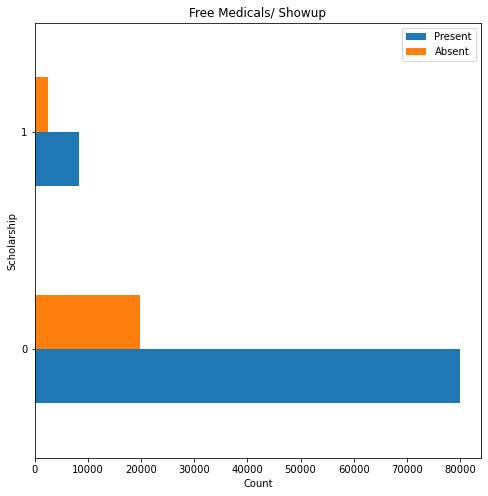

In [29]:
#shows relationship between patient showing up and scholarship

df_S = df.groupby('Scholarship')['No-show'].value_counts().unstack()
df_S.plot(kind = 'barh', figsize = (8,8))
plt.title("Free Medicals/ Showup")
plt.legend(['Present','Absent'])
plt.ylabel("Scholarship")
plt.xlabel("Count")

We can notice that 9% of patients received a scholarship. However, a large number of those who received the scholarship attended. Therefore we can conclude that having access to scholarship isn't an important factor in deciding if patients show up to appointments.

### Does Age affect patient showing up?

Text(0, 0.5, 'patient count')

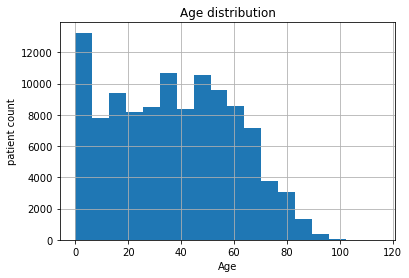

In [41]:
#a histogram of age distribution among patients
df['Age'].hist(bins=18)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('patient count')

Most of the patients are young and majority are below 60

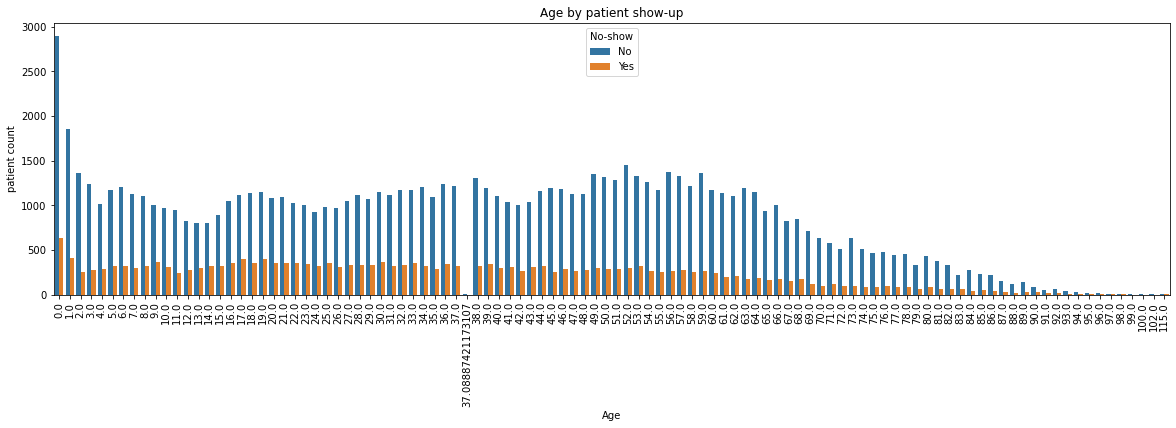

In [43]:
#a plot of age by patient show-up
plt.figure(figsize=(20,5))
sns.countplot(x=df['Age'], hue=df['No-show'])
plt.xticks(rotation=90)
plt.title('Age by patient show-up')
plt.ylabel('patient count');

more youths visit the hospitals and as the age increases, the ability to show up for appointment decrease. so, more youths attend appointments than the elderly

<a id='conclusions'></a>
## Conclusions

>After carrying out a detailed analysis,the following conclusions can be made;
 -  Approximately 80% of patients show up for appointment
 -  we can conclude that waiting days affect the patient's ability to show up for appointment as the higher the waiting days, the lesser the chances of showing up.
 -  more females attend doctor's appointment than males
 -  sms_reminder have little or no effect on patient show-up rate
 -  being on scholarship has no importance on the ability to show up to appointment 
>Limitations
 -  some of the waiting days calculated gave a negative value and this is invalid as appointment day cannot come before the schedule day.
 -  there aren't enough details to draw conclusions from the factors
 -  not enough calculations can be done as the data is mostly categorical

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])